In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("This is a classification task because of binary classfication.")

This is a classification task because of binary classfication.


In [2]:
df = pd.read_csv('data.csv')
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [3]:
print("There are {} observations in the dataset.\n".format(len(df)))
print("There are {} missing values which means there are no missing values in the dataset.\n"
    .format(df.isna().sum().sum()))
print(df.nunique())
print("Age, trtbps, chol, thalachh, oldpeak, and slp have more than 10 unique values,\n" \
    " which means they are continuous variables.\n" \
    " Sex, cp, fbs, restecg, exng, and caa have 10 or fewer unique values,\n" \
    " which means they are categorical variables.")

There are 303 observations in the dataset.

There are 0 missing values which means there are no missing values in the dataset.

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64
Age, trtbps, chol, thalachh, oldpeak, and slp have more than 10 unique values,
 which means they are continuous variables.
 Sex, cp, fbs, restecg, exng, and caa have 10 or fewer unique values,
 which means they are categorical variables.


The dataset is imbalanced because there are more people prone to heart attacks

Working with an imbalanced dataset can lead to biased models that perform poorly on the minority class.

To address this issue, we can use techniques such as oversampling the minority class, 
undersampling the majority class, 
or using algorithms that are designed to handle imbalanced data.



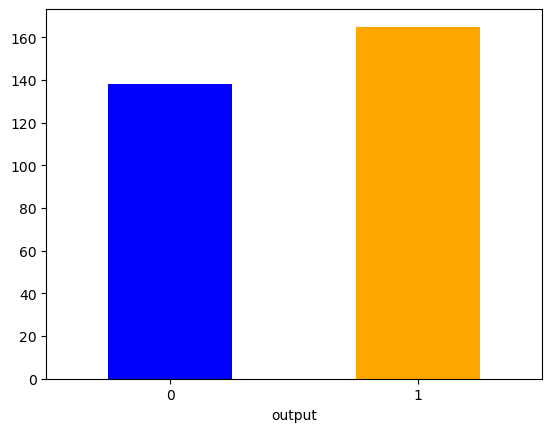

In [4]:
outputCounts = df['output'].value_counts().sort_index()
outputCounts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("output")
plt.xticks(rotation=0)

print("The dataset is imbalanced because there are more people prone to heart attacks\n")
print("Working with an imbalanced dataset can lead to biased models that perform poorly on the minority class.\n")
print("To address this issue, we can use techniques such as oversampling the minority class, \n" \
    "undersampling the majority class, \n"
    "or using algorithms that are designed to handle imbalanced data.\n")

The majority of the patients in the dataset are female, 
and the majority of the patients have a slp value of 2.
It is interesting how female patients are more prone to heart attacks than male patients, 
which is the opposite of what we would expect based on general medical knowledge.



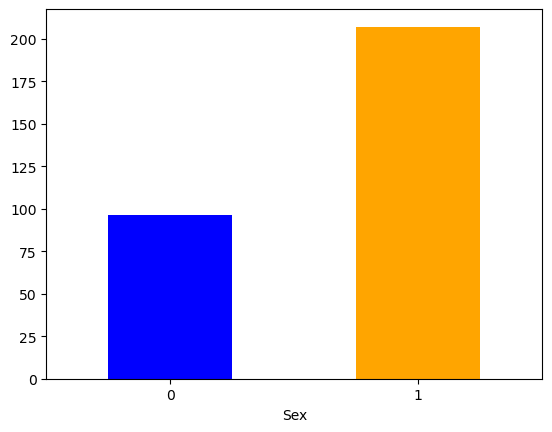

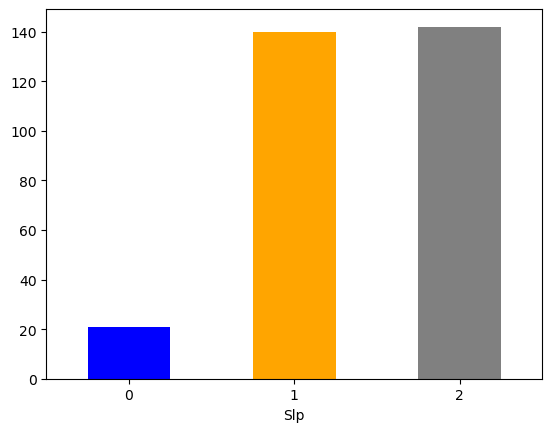

In [5]:
sexCounts = df['sex'].value_counts().sort_index()
ax = sexCounts.plot(kind='bar', color=['blue', 'orange'])
ax.set_xlabel("Sex")
ax.set_xticks(range(len(sexCounts.index)))
ax.set_xticklabels(sexCounts.index, rotation=0)

plt.figure()

slpCounts = df['slp'].value_counts().sort_index()
ax = slpCounts.plot(kind='bar', color=['blue', 'orange', 'gray'])
ax.set_xlabel("Slp")
ax.set_xticks(range(len(slpCounts.index)))
ax.set_xticklabels(slpCounts.index, rotation=0)

print("The majority of the patients in the dataset are female, \n"
      "and the majority of the patients have a slp value of 2.\n"
      "It is interesting how female patients are more prone to heart attacks than male patients, \n" \
      "which is the opposite of what we would expect based on general medical knowledge.\n")

Younger women are more prone to heart attacks and older men are more prone to heart attacks. 
This is interesting because it is generally expected that older people are more prone to heart attacks than younger people. 



C:\Users\legen\AppData\Local\Temp\ipykernel_21868\2918592310.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='output', y='age', palette=['blue', 'orange'])
C:\Users\legen\AppData\Local\Temp\ipykernel_21868\2918592310.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='output', y='chol', palette=['blue', 'orange'])


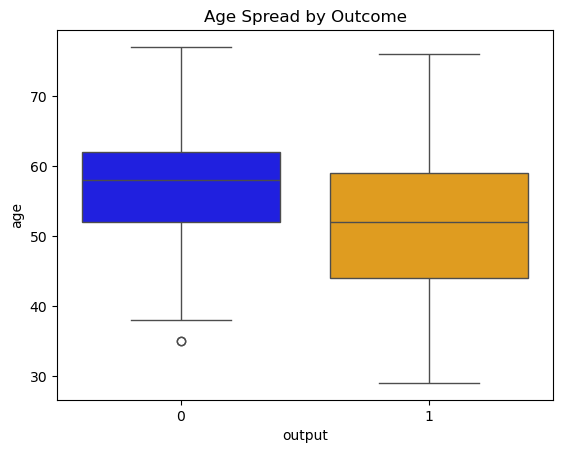

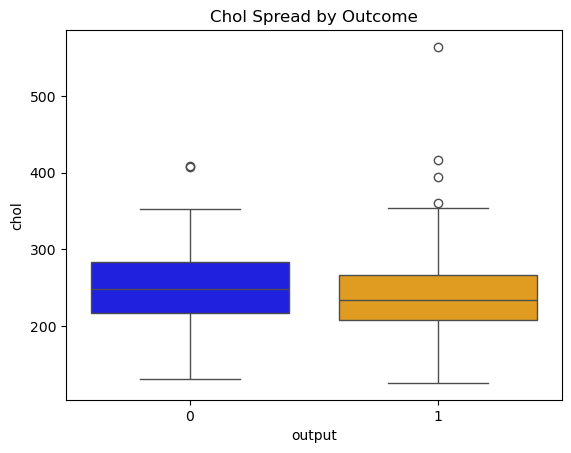

In [6]:
sns.boxplot(data=df, x='output', y='age', palette=['blue', 'orange'])
plt.title("Age Spread by Outcome")

plt.figure()

sns.boxplot(data=df, x='output', y='chol', palette=['blue', 'orange'])
plt.title("Chol Spread by Outcome")

print("Younger women are more prone to heart attacks and older men are more prone to heart attacks. \n" \
    "This is interesting because it is generally expected that older people are more prone to heart attacks than younger people. \n")

Patients with higher trtbps values are more prone to heart attacks, 
and patients with cp value of 0 are more prone to heart attacks. 
This is interesting because it is generally expected that patients with higher trtbps values are more prone to heart attacks, 
but it is not expected that patients with cp value of 0 are more prone to heart attacks than patients with cp value of 1, 2, or 3.



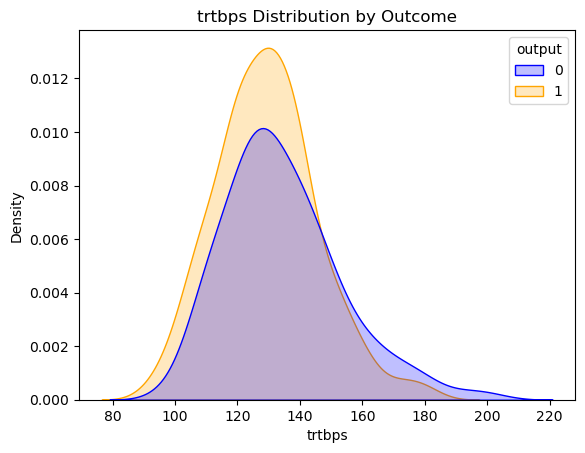

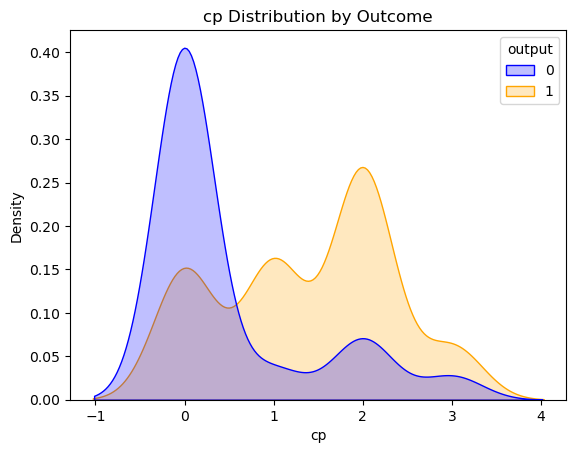

In [7]:
sns.kdeplot(data=df, x='trtbps', hue='output', fill=True, palette=['blue', 'orange'])
plt.title("trtbps Distribution by Outcome")

plt.figure()

sns.kdeplot(data=df, x='cp', hue='output', fill=True, palette=['blue', 'orange'])
plt.title("cp Distribution by Outcome")

print("Patients with higher trtbps values are more prone to heart attacks, \n" \
    "and patients with cp value of 0 are more prone to heart attacks. \n" \
    "This is interesting because it is generally expected that patients with higher trtbps values are more prone to heart attacks, \n" \
    "but it is not expected that patients with cp value of 0 are more prone to heart attacks than patients with cp value of 1, 2, or 3.\n")

The features that are most positively correlated with the output variable are cp, thalachh, and slp, 
this is interesting because it is generally expected that cp and thalachh are positively correlated with the output variable, 
but it is not expected that slp is positively correlated with the output variable.



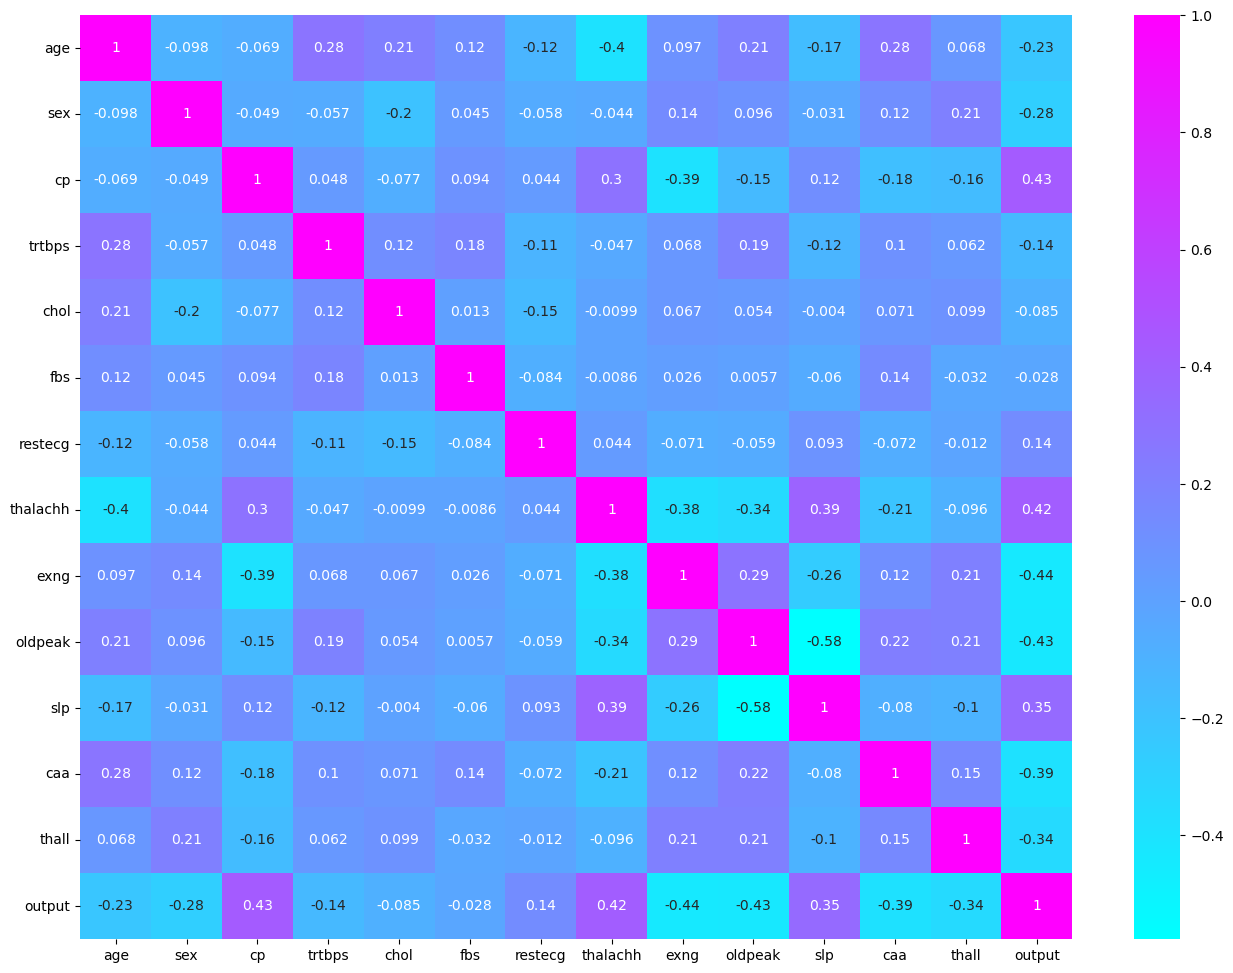

In [8]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

print("The features that are most positively correlated with the output variable are cp, thalachh, and slp, \n" \
      "this is interesting because it is generally expected that cp and thalachh are positively correlated with the output variable, \n" \
      "but it is not expected that slp is positively correlated with the output variable.\n")

As age increases, the cp value tends to decrease for patients who are not prone to heart attacks, 
This is interesting because it is generally expected that as age increases, 
the cp value would increase for patients who are not prone to heart attacks. 



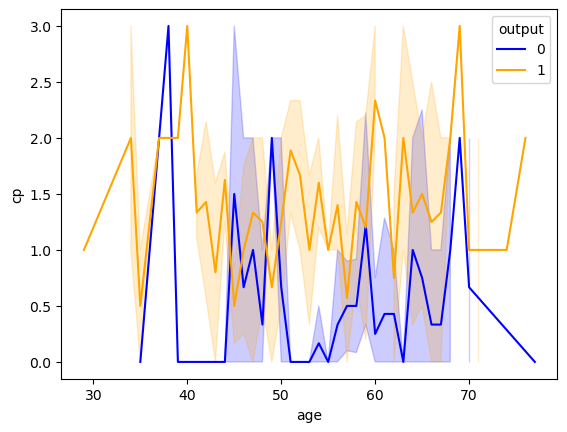

In [9]:
sns.lineplot(data=df, x='age', y='cp', hue='output', palette=['blue', 'orange'])

print("As age increases, the cp value tends to decrease for patients who are not prone to heart attacks, \n" \
      "This is interesting because it is generally expected that as age increases, \n" \
      "the cp value would increase for patients who are not prone to heart attacks. \n")

In [10]:
print("Models that could be used to solve the problem statement include logistic regression and random forests.\n")
print("The difference between label encoding and one-hot encoding is that label encoding assigns a unique integer to each category, \n" \
      "while one-hot encoding creates a binary column for each category and assigns a value of 1 or 0 to indicate the presence or absence of that category in the data.\n")
print("Multicollinearity is a situation in which two or more independent variables in a regression model are highly correlated with each other, \n" \
      "we care about that when creating a model because it can lead to unstable estimates of the coefficients and make it difficult to interpret the results of the model.\n" \
        "We can check to see if there is multicollinearity in our dataset by calculating the correlation matrix and looking for pairs of variables that have a high correlation coefficient, \n" \
        "or by calculating the variance inflation factor (VIF) for each independent variable and looking for variables with a VIF greater than 5 or 10.\n")
print("Data scaling is important when creating a model because it can help to improve the performance of the model by ensuring that all features are on the same scale, \n" \
      "which can help to prevent certain features from dominating the model and can also help to improve the convergence of the model during training.\n")
print("Logistic regression is using parametric learning algorithms and \n "\
      "random forests is using non-parametric learning algorithms.\n" \
        "The difference between parametric and non-parametric learning algorithms is that parametric algorithms make assumptions about the underlying distribution of the data and have a fixed number of parameters, \n" \
        "while non-parametric algorithms do not make assumptions about the underlying distribution of the data and can have a variable number of parameters that grow with the size of the dataset.\n")
print("If we had missing values in the dataset, we could handle them by using techniques such as imputation, \n" \
      "which involves filling in the missing values with estimated values based on the other data in the dataset, \n" \
      "or by using algorithms that are designed to handle missing data, such as decision trees or random forests.\n")

Models that could be used to solve the problem statement include logistic regression and random forests.

The difference between label encoding and one-hot encoding is that label encoding assigns a unique integer to each category, 
while one-hot encoding creates a binary column for each category and assigns a value of 1 or 0 to indicate the presence or absence of that category in the data.

Multicollinearity is a situation in which two or more independent variables in a regression model are highly correlated with each other, 
we care about that when creating a model because it can lead to unstable estimates of the coefficients and make it difficult to interpret the results of the model.
We can check to see if there is multicollinearity in our dataset by calculating the correlation matrix and looking for pairs of variables that have a high correlation coefficient, 
or by calculating the variance inflation factor (VIF) for each independent variable and looking for variables with a VIF gr


Logistic Regression - 5-Fold CV
Accuracy: 0.8136 ± 0.1007
F1 Score: 0.8341 ± 0.0948

Logistic Regression - Test Set
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

[[19  9]
 [ 3 30]]


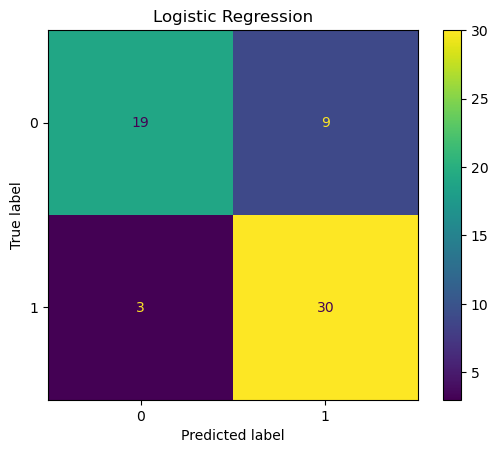


Gaussian Naive Bayes - 5-Fold CV
Accuracy: 0.8178 ± 0.1124
F1 Score: 0.8373 ± 0.1021

Gaussian Naive Bayes - Test Set
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

[[20  8]
 [ 3 30]]


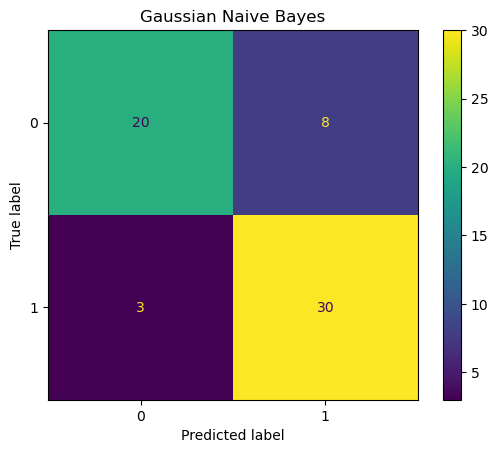

I did scale the data for logistic regression but not for Gaussian Naive Bayes.
The scaling method I used for logistic regression is standardization, which involves subtracting the mean and dividing by the standard deviation for each feature. 
I used standardization because it is a common scaling method that can help to improve the performance of logistic regression by ensuring that all features are on the same scale, 
which can help to prevent certain features from dominating the model and can also help to improve the convergence of the model during training.
The reason I picked the 2 models is because they are strong baseline models.
The model that performed better is logistic regression.



In [11]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = df.drop(columns='output')
y = df['output']

numCols = X.select_dtypes(include=['int64', 'float64']).columns
catCols = X.select_dtypes(exclude=['int64', 'float64']).columns

numericPipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categoricalPipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer([
    ("num", numericPipe, numCols),
    ("cat", categoricalPipe, catCols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Gaussian Naive Bayes": GaussianNB()
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    clf = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])

    cvAcc = cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    cvF1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring="f1", n_jobs=-1)

    print(f"\n{name} - 5-Fold CV")
    print(f"Accuracy: {cvAcc.mean():.4f} ± {cvAcc.std():.4f}")
    print(f"F1 Score: {cvF1.mean():.4f} ± {cvF1.std():.4f}")

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n{name} - Test Set")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(name)
    plt.show()

print("I did scale the data for logistic regression but not for Gaussian Naive Bayes.\n" \
      "The scaling method I used for logistic regression is standardization, which involves subtracting the mean and dividing by the standard deviation for each feature. \n" \
        "I used standardization because it is a common scaling method that can help to improve the performance of logistic regression by ensuring that all features are on the same scale, \n" \
        "which can help to prevent certain features from dominating the model and can also help to improve the convergence of the model during training.\n"
        "The reason I picked the 2 models is because they are strong baseline models.\n"
        "The model that performed better is logistic regression.\n")